In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\HP\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.shape,test.shape

((140700, 20), (93800, 19))

In [5]:
train['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

- Target column('Depression') have imbalanced data.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

In [7]:
train = train.drop('Name', axis=1)
test = test.drop('Name', axis=1)

# Feature Engineering

#### Profession column

In [8]:
train['Profession'].isnull().sum()

36630

In [9]:
train['Profession'] = train['Profession'].fillna("missing")
test['Profession'] = test['Profession'].fillna("missing")

In [10]:
profession_cnt =train['Profession'].value_counts()
profession_cnt

Profession
missing              36630
Teacher              24906
Content Writer        7814
Architect             4370
Consultant            4229
                     ...  
Dev                      1
BE                       1
B.Com                    1
Family Consultant        1
Yuvraj                   1
Name: count, Length: 65, dtype: int64

In [11]:
profession_threshold_df = 2814
profession_threshold_tf = 1594
profession_cnt_df = train['Profession'].value_counts()
profession_cnt_tf = test['Profession'].value_counts()
replace_profession_df = profession_cnt[profession_cnt < profession_threshold_df].index
replace_profession_tf = profession_cnt_tf[profession_cnt_tf < profession_threshold_tf].index

In [12]:
train['Profession'] = train['Profession'].replace(replace_profession_df,"Unknown_profession")
test['Profession'] = test['Profession'].replace(replace_profession_tf,"Unknown_profession")

In [13]:
train['Profession'].value_counts()

Profession
Unknown_profession        36771
missing                   36630
Teacher                   24906
Content Writer             7814
Architect                  4370
Consultant                 4229
HR Manager                 4022
Pharmacist                 3893
Doctor                     3255
Business Analyst           3161
Entrepreneur               2968
Chemist                    2967
Chef                       2862
Educational Consultant     2852
Name: count, dtype: int64

#### Academic Pressure

In [14]:
print(train['Academic Pressure'].isnull().sum())
print(test['Academic Pressure'].isnull().sum())

112803
75033


In [15]:
# Fill missing values in numerical columns with the mean
for column in train.columns:
  if pd.api.types.is_numeric_dtype(train[column]):
    train[column] = train[column].fillna(train[column].mean())
    if column in test.columns:
      test[column] = test[column].fillna(test[column].mean())

In [16]:
train['Academic Pressure'].value_counts()

Academic Pressure
3.142273    112803
3.000000      7463
5.000000      6296
4.000000      5158
1.000000      4801
2.000000      4179
Name: count, dtype: int64

In [17]:
# Fill missing values in 'Study Satisfaction' with the median
train['Study Satisfaction'] = train['Study Satisfaction'].fillna(train['Study Satisfaction'].median())

# If you want to fill missing values in the test set as well, uncomment the following line:
test['Study Satisfaction'] = test['Study Satisfaction'].fillna(test['Study Satisfaction'].median())

In [18]:
# Fill missing values in 'Study Satisfaction' with the median
train['Job Satisfaction'] = train['Job Satisfaction'].fillna(train['Job Satisfaction'].median())

# If you want to fill missing values in the test set as well, uncomment the following line:
test['Job Satisfaction'] = test['Job Satisfaction'].fillna(test['Job Satisfaction'].median())

In [19]:
train.shape,test.shape

((140700, 19), (93800, 18))

In [20]:
df = train.copy()
tf = test.copy()
df.shape,tf.shape

((140700, 19), (93800, 18))

In [21]:
df['CGPA'].isnull().sum()
tf['CGPA'].isnull().sum()

0

In [22]:
df['CGPA'].fillna(df['CGPA'].mean(),inplace=True)
tf['CGPA'].fillna(tf['CGPA'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6776\2647841782.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CGPA'].fillna(df['CGPA'].mean(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6776\2647841782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 19 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Gender                                 140700 non-null  object 
 2   Age                                    140700 non-null  float64
 3   City                                   140700 non-null  object 
 4   Working Professional or Student        140700 non-null  object 
 5   Profession                             140700 non-null  object 
 6   Academic Pressure                      140700 non-null  float64
 7   Work Pressure                          140700 non-null  float64
 8   CGPA                                   140700 non-null  float64
 9   Study Satisfaction                     140700 non-null  float64
 10  Job Satisfaction                       140700 non-null  

In [24]:
df['Degree'].isnull().sum()

2

In [25]:
df['Degree'].fillna(df['Degree'].mode()[0],inplace=True)
tf['Degree'].fillna(tf['Degree'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6776\2518624376.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Degree'].fillna(df['Degree'].mode()[0],inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6776\2518624376.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [26]:
# Check if 'Name' column exists before dropping
if 'Name' in df.columns:
    df.drop(['id','Name'],axis=1,inplace=True)
if 'Name' in tf.columns:
  tf.drop(['id','Name'],axis=1,inplace=True)

In [27]:
df.shape,tf.shape

((140700, 19), (93800, 18))

In [28]:
df = pd.get_dummies(df,columns=['Profession'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Profession'],drop_first=True)

In [29]:
df.shape,tf.shape

((140700, 31), (93800, 30))

<Axes: xlabel='Dietary Habits'>

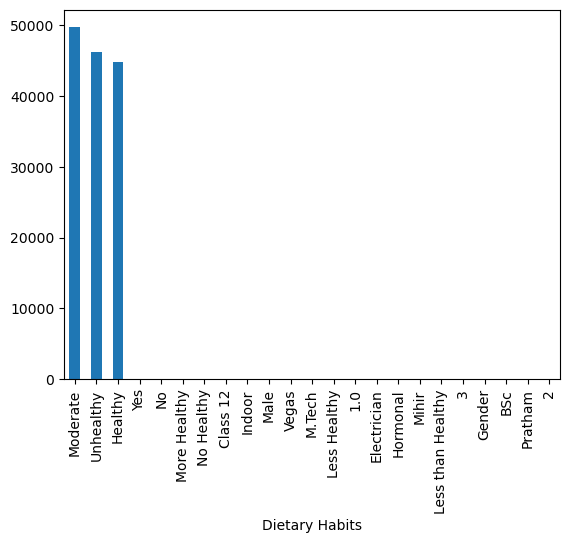

In [30]:
df['Dietary Habits'].value_counts().plot(kind='bar')

In [31]:
df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0],inplace=True)
tf['Dietary Habits'].fillna(tf['Dietary Habits'].mode()[0],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6776\3687034632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dietary Habits'].fillna(df['Dietary Habits'].mode()[0],inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6776\3687034632.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [32]:
df['Financial Stress'].fillna(df['Financial Stress'].median(),inplace=True)
tf['Financial Stress'].fillna(tf['Financial Stress'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_6776\3483033245.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Financial Stress'].fillna(df['Financial Stress'].median(),inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_6776\3483033245.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

## Work with Categorical columns

#### Gender column

In [33]:
df['Gender'].value_counts()

Gender
Male      77464
Female    63236
Name: count, dtype: int64

In [34]:
print(df.shape,tf.shape)
df = pd.get_dummies(df,columns=['Gender'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Gender'],drop_first=True)

(140700, 31) (93800, 30)


In [35]:
df.shape,tf.shape

((140700, 31), (93800, 30))

#### City column

In [36]:
df['City'].value_counts()

City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Shrey             1
Ivaan             1
Vaanya            1
Gaurav            1
Unirar            1
Name: count, Length: 98, dtype: int64

In [37]:
city_df = 3000
city_tf = 2000
city_count_df = df['City'].value_counts()
city_count_tf = tf['City'].value_counts()
replace_city_df = city_count_df[city_count_df < city_df].index
replace_city_tf = city_count_tf[city_count_tf < city_tf].index

In [38]:
df['City'] = df['City'].replace(replace_city_df,'Unknown_city')
tf['City'] = tf['City'].replace(replace_city_tf,'Unknown_city')

In [39]:
df['City'].value_counts()

City
Kalyan           6591
Patna            5924
Vasai-Virar      5765
Kolkata          5689
Ahmedabad        5613
Meerut           5528
Ludhiana         5226
Pune             5210
Rajkot           5207
Visakhapatnam    5176
Srinagar         5074
Mumbai           4966
Indore           4872
Agra             4684
Surat            4636
Varanasi         4606
Vadodara         4568
Hyderabad        4496
Kanpur           4398
Jaipur           4328
Thane            4289
Lucknow          4280
Nagpur           4209
Bangalore        4123
Chennai          4044
Ghaziabad        3620
Delhi            3593
Bhopal           3475
Faridabad        3268
Nashik           3144
Unknown_city       98
Name: count, dtype: int64

In [40]:
df = pd.get_dummies(df,columns=['City'],drop_first=True)
tf = pd.get_dummies(tf,columns=['City'],drop_first=True)

In [41]:
df.shape,tf.shape

((140700, 60), (93800, 59))

#### Working Professional or Student column

In [42]:
df = pd.get_dummies(df,columns=['Working Professional or Student'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Working Professional or Student'],drop_first=True)
df.shape,tf.shape

((140700, 60), (93800, 59))

#### Sleep Duration column

In [43]:
df['Sleep Duration'].value_counts()

Sleep Duration
Less than 5 hours    38784
7-8 hours            36969
More than 8 hours    32726
5-6 hours            32142
3-4 hours               12
6-7 hours                8
4-5 hours                7
2-3 hours                5
4-6 hours                5
6-8 hours                4
1-6 hours                4
No                       4
9-11 hours               2
10-11 hours              2
Sleep_Duration           2
Unhealthy                2
45                       2
8-9 hours                2
10-6 hours               1
9-5                      1
45-48 hours              1
3-6 hours                1
Work_Study_Hours         1
49 hours                 1
than 5 hours             1
Pune                     1
9-6 hours                1
8 hours                  1
35-36 hours              1
Indore                   1
1-3 hours                1
55-66 hours              1
Moderate                 1
40-45 hours              1
1-2 hours                1
9-5 hours                1
Name: count, 

<Axes: xlabel='Sleep Duration'>

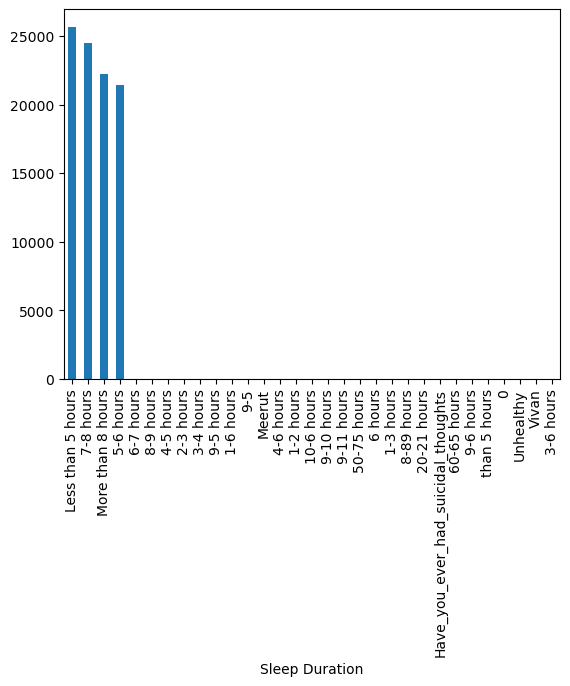

In [44]:
#df['Sleep Duration'].value_counts().plot(kind='bar')#32142
tf['Sleep Duration'].value_counts().plot(kind='bar')#21404

In [45]:
from os import replace
sleep_threshold_df = 30000
sleep_threshold_tf = 20000
sleep_count_df = df['Sleep Duration'].value_counts()
sleep_count_tf = tf['Sleep Duration'].value_counts()
replace_sleep_df = sleep_count_df[sleep_count_df < sleep_threshold_df].index
replace_sleep_tf = sleep_count_tf[sleep_count_tf < sleep_threshold_tf].index

In [46]:
df['Sleep Duration'] = df['Sleep Duration'].replace(replace_sleep_df,'Unknown_sleep')
tf['Sleep Duration'] = tf['Sleep Duration'].replace(replace_sleep_tf,'Unknown_sleep')

In [47]:
df.shape,tf.shape

((140700, 60), (93800, 59))

In [48]:
df = pd.get_dummies(df,columns=['Sleep Duration'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Sleep Duration'],drop_first=True)

In [49]:
df.shape,tf.shape

((140700, 63), (93800, 62))

In [51]:
#df.info()

#### Dietary Habits

In [52]:
#df['Dietary Habits'].value_counts().plot(kind='bar')#44741
#tf['Dietary Habits'].value_counts().plot(kind='bar')#29966
df['Dietary Habits'].value_counts()

Dietary Habits
Moderate             49709
Unhealthy            46227
Healthy              44741
Yes                      2
No                       2
More Healthy             2
No Healthy               1
Class 12                 1
Indoor                   1
Male                     1
Vegas                    1
M.Tech                   1
Less Healthy             1
1.0                      1
Electrician              1
Hormonal                 1
Mihir                    1
Less than Healthy        1
3                        1
Gender                   1
BSc                      1
Pratham                  1
2                        1
Name: count, dtype: int64

In [53]:
dietary_threshold_df = 40000
dietary_threshold_tf = 25000
dietary_count_df = df['Dietary Habits'].value_counts()
dietary_count_tf = tf['Dietary Habits'].value_counts()
replace_dietary_df = dietary_count_df[dietary_count_df < dietary_threshold_df].index
replace_dietary_tf = dietary_count_tf[dietary_count_tf < dietary_threshold_tf].index

In [54]:
df['Dietary Habits'] = df['Dietary Habits'].replace(replace_dietary_df,'Unknown_dietary')
tf['Dietary Habits'] = tf['Dietary Habits'].replace(replace_dietary_tf,'Unknown_dietary')

In [55]:
df = pd.get_dummies(df,columns=['Dietary Habits'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Dietary Habits'],drop_first=True)

In [56]:
df.shape,tf.shape

((140700, 65), (93800, 64))

#### Degree

In [57]:
df['Degree'].unique()#5856
#tf['Degree'].value_counts()#3987

array(['BHM', 'LLB', 'B.Pharm', 'BBA', 'MCA', 'MD', 'BSc', 'ME', 'B.Arch',
       'BCA', 'BE', 'MA', 'B.Ed', 'B.Com', 'MBA', 'M.Com', 'MHM', 'BA',
       'Class 12', 'M.Tech', 'PhD', 'M.Ed', 'MSc', 'B.Tech', 'LLM',
       'MBBS', 'M.Pharm', 'UX/UI Designer', 'MPA', 'BH', 'Nalini', 'BEd',
       'B.Sc', 'Veda', 'Bhopal', 'S.Tech', 'Degree', '20', 'Class 11',
       'H_Pharm', 'M', 'P.Com', 'BPharm', 'Business Analyst', 'M.Arch',
       'LL.Com', 'Data Scientist', 'MPharm', 'L.Ed', 'P.Pharm', 'Kalyan',
       'Unite', 'BArch', 'HR Manager', 'Badhya', 'S.Pharm', 'LLBA',
       'Vrinda', 'M. Business Analyst', 'Bhavesh', '0', 'LLCom', '29',
       'MTech', 'Vivaan', 'BPA', 'Plumber', '5.61', 'Brit', 'B.03',
       'Ritik', '5.56', 'MEd', 'B', 'B BA', '7.06', 'B.B.Arch', 'ACA',
       'Brithika', 'CGPA', '24', 'M_Tech', 'Pihu', 'BB', 'Jhanvi',
       'LLTech', 'Aarav', 'Entrepreneur', '8.56', 'LHM', 'Lata', 'S.Arch',
       'Marsh', 'HCA', '5.88', 'B.Student', 'LL B.Ed', 'M.S', 'Navya',
   

In [58]:
Degree_threshold_df = 2884
Degree_threshold_tf = 1922
Degree_count_df = df['Degree'].value_counts()
Degree_count_tf = tf['Degree'].value_counts()
replace_Degree_df = Degree_count_df[Degree_count_df < Degree_threshold_df].index
replace_Degree_tf = Degree_count_tf[Degree_count_tf < Degree_threshold_tf].index

In [59]:
df['Degree'] = df['Degree'].replace(replace_Degree_df,'Unknown_degree')
tf['Degree'] = tf['Degree'].replace(replace_Degree_tf,'Unknown_degree')

In [60]:
df['Degree'].value_counts()#,df['Degree'].value_counts()

Degree
Class 12          14731
B.Ed              11691
B.Arch             8742
B.Com              8113
B.Pharm            5856
BCA                5739
M.Ed               5668
MCA                5234
BBA                5030
BSc                5027
MSc                4879
LLM                4647
M.Pharm            4537
M.Tech             4475
B.Tech             4425
LLB                4348
BHM                4305
MBA                3818
BA                 3750
ME                 3632
MD                 3383
MHM                3286
BE                 3104
PhD                3103
M.Com              3094
MBBS               3082
MA                 2887
Unknown_degree      114
Name: count, dtype: int64

In [61]:
df.shape,tf.shape

((140700, 65), (93800, 64))

In [62]:
df = pd.get_dummies(df,columns=['Degree'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Degree'],drop_first=True)

In [63]:
df.shape,tf.shape

((140700, 91), (93800, 90))

#### Have you ever had suicidal thoughts ?

In [64]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     71138
Yes    69562
Name: count, dtype: int64

In [65]:
df = pd.get_dummies(df,columns=['Have you ever had suicidal thoughts ?'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Have you ever had suicidal thoughts ?'],drop_first=True)

In [66]:
df.shape,tf.shape

((140700, 91), (93800, 90))

#### Family History of Mental Illness

In [67]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     70758
Yes    69942
Name: count, dtype: int64

In [68]:
df = pd.get_dummies(df,columns=['Family History of Mental Illness'],drop_first=True)
tf = pd.get_dummies(tf,columns=['Family History of Mental Illness'],drop_first=True)

In [69]:
df.shape,tf.shape

((140700, 91), (93800, 90))

##### - replace all bool to corresponding 0 & 1 in df and tf

In [70]:
for column in df.columns:
  if pd.api.types.is_bool_dtype(df[column]):
    df[column] = df[column].astype(int)
    # Check if the column exists in tf before attempting to access it
    if column in tf.columns:
      tf[column] = tf[column].astype(int)
    else:
      print(f"Warning: Column '{column}' not found in tf DataFrame. Skipping...")

In [71]:
df.shape,tf.shape

((140700, 91), (93800, 90))

In [72]:
print("Train data have missing values: ",df.isnull().sum().sum())
print("Test data have missing values: ",tf.isnull().sum().sum())

Train data have missing values:  0
Test data have missing values:  0


In [73]:
X = df.drop('Depression',axis=1)
y = df['Depression']

In [74]:
X.shape,y.shape

((140700, 90), (140700,))

#### Spliting the data in train and test set

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
!pip install catboost

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [78]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [79]:
X_train

array([[-0.90288329,  1.17810798,  0.00201453, ..., -0.02875603,
        -0.9898173 ,  1.00468403],
       [ 1.55498813,  1.09737394,  0.00201453, ..., -0.02875603,
        -0.9898173 ,  1.00468403],
       [ 1.05243912,  0.61296973,  0.00201453, ..., -0.02875603,
        -0.9898173 ,  1.00468403],
       ...,
       [ 0.81928768, -1.72831732,  0.00201453, ..., -0.02875603,
         1.01028745,  1.00468403],
       [ 1.51414049, -1.72831732,  0.00201453, ..., -0.02875603,
        -0.9898173 , -0.9953378 ],
       [ 1.26871015,  1.25884201,  0.00201453, ..., -0.02875603,
        -0.9898173 ,  1.00468403]])

In [80]:
df['Depression'].value_counts()

Depression
0    115133
1     25567
Name: count, dtype: int64

In [81]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

In [82]:
xg = XGBClassifier(use_label_encoder=False,eval_metric='logloss')
xg.fit(X_train,y_train)

c:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:16:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [83]:
xg_pred = xg.predict(X_test)
accuracy_xg = accuracy_score(y_test,xg_pred)
accuracy_xg

0.9372068230277185

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, xg_pred))

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, xg_pred)
print("Confusion Matrix:")
cm

# You can also visualize the confusion matrix using seaborn
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22986
           1       0.84      0.82      0.83      5154

    accuracy                           0.94     28140
   macro avg       0.90      0.89      0.89     28140
weighted avg       0.94      0.94      0.94     28140

Confusion Matrix:


array([[22172,   814],
       [  953,  4201]], dtype=int64)

In [86]:
ct = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=False,
    class_weights={0:0.2,1:0.51}
)
ct.fit(X_train,y_train)

In [87]:
ct_pred = ct.predict(X_test)
accuracy_ct = accuracy_score(y_test,ct_pred)
accuracy_ct

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, ct_pred))

# Calculate and print the confusion matrix
cm = confusion_matrix(y_test, ct_pred)
print("Confusion Matrix:")
print(cm)


tf_scaled = scale.transform(tf)
submission_pred = ct.predict(tf_scaled)


# Create a submission DataFrame
submission_df = pd.DataFrame({'id': test['id'], 'Depression': submission_pred})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('kew_cilo_na.csv', index=False)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     22986
           1       0.77      0.90      0.83      5154

    accuracy                           0.93     28140
   macro avg       0.87      0.92      0.89     28140
weighted avg       0.94      0.93      0.93     28140

Confusion Matrix:
[[21563  1423]
 [  509  4645]]
